# Exploración de datos challenger Mercado libre

In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', 40)
import warnings 
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [104]:
#carga del dataset compartido 
df=pd.read_csv('../raw_data/MercadoLibre Data Scientist Technical Challenge - Dataset.csv')
df.head(3)

,a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,4,0.6812,50084.12,50.0,0.000000,20.0,AR,1,cat_d26ab52,0.365475,2479.0,952.0,1,NaN,Y,2020-03-20 09:28:19,57.63,100,0
1,4,0.6694,66005.49,0.0,0.000000,2.0,AR,1,cat_ea962fb,0.612728,2603.0,105.0,1,Y,Y,2020-03-09 13:58:28,40.19,25,0
2,4,0.4718,7059.05,4.0,0.463488,92.0,BR,25,cat_4c2544e,0.651835,2153.0,249.0,1,Y,Y,2020-04-08 12:25:55,5.77,23,0


In [105]:
df['fecha']=pd.to_datetime(df.fecha,format='%Y-%m-%d %H:%M:%S')

In [106]:
# revisamos los tipos  y nullos en el df
display(pd.DataFrame(df.isna().sum()).T)
df.info()

,a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,fecha,monto,score,fraude
0,0,12984,12984,365,0,11,194,0,0,0,11,365,0,108857,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   a       150000 non-null  int64         
 1   b       137016 non-null  float64       
 2   c       137016 non-null  float64       
 3   d       149635 non-null  float64       
 4   e       150000 non-null  float64       
 5   f       149989 non-null  float64       
 6   g       149806 non-null  object        
 7   h       150000 non-null  int64         
 8   j       150000 non-null  object        
 9   k       150000 non-null  float64       
 10  l       149989 non-null  float64       
 11  m       149635 non-null  float64       
 12  n       150000 non-null  int64         
 13  o       41143 non-null   object        
 14  p       150000 non-null  object        
 15  fecha   150000 non-null  datetime64[ns]
 16  monto   150000 non-null  float64       
 17  score   150000 non-null  int6

In [107]:
var_string=df.select_dtypes(include='object').columns

### exploración categoricas

0
1
2


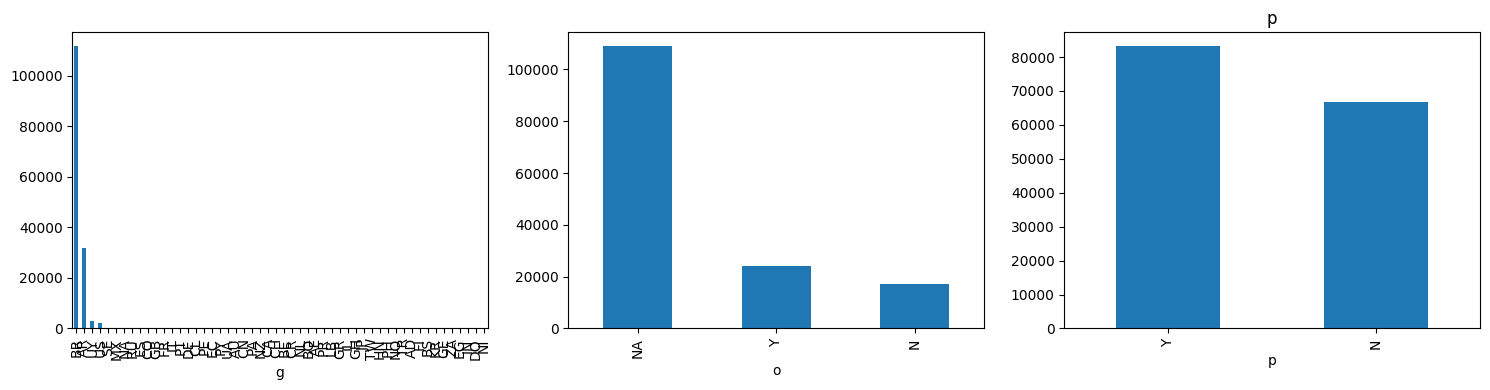

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i,columna in enumerate(var_string.drop('j')):
    ax = axs[i]
    df[columna].fillna('NA').value_counts().plot(kind='bar', ax=ax)
    plt.title(columna)
    plt.tight_layout()
    print(i)
plt.show()

In [109]:
#la columan "o" sera descartada tiene muchos nullos y no tenemos forma de trabajar con ella
#la columan "p" sera transformada en 1 y 0
#la columan "g"denota la ciudad por ahora la mantendremos
#se excluyo la columna "j" aun no tenemos más información
df.drop(columns='o',inplace=True)
df["p"]=np.where(df["p"]=="Y",1,0)

### exploración numericas

In [110]:
var_number=df.select_dtypes(exclude='object').columns
df[var_number].describe()

,a,b,c,d,e,f,h,k,l,m,n,p,fecha,monto,score,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000.000000,150000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,0.554193,2020-03-30 23:41:40.546253312,43.523134,48.066240,0.050000
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,2020-03-08 00:02:15,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,0.000000,2020-03-18 12:40:32.249999872,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,1.000000,2020-03-31 00:08:33,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,1.000000,2020-04-12 12:40:16,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,1.000000,2020-04-21 23:59:56,3696.350000,100.000000,1.000000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,0.497056,NaN,91.557888,28.995122,0.217946


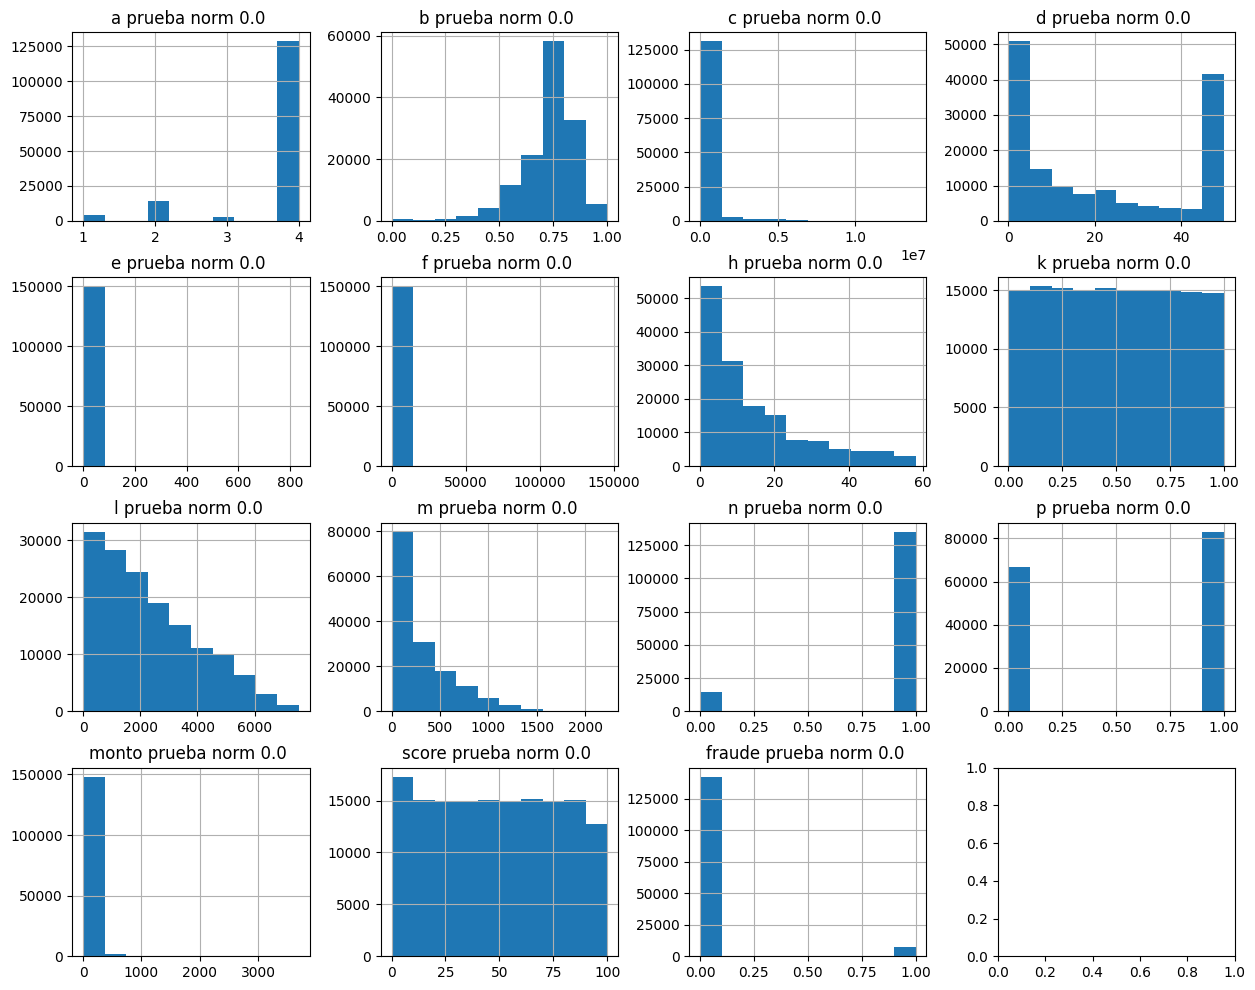

,a,b,c,d,e,f,h,k,l,m,n,p,fecha,monto,score,fraude
0,0,12984,12984,365,0,11,0,0,11,365,0,0,0,0,0,0


In [111]:
fig, axs = plt.subplots(4, 4, figsize=(15, 12))
for i,columna in enumerate(var_number.drop('fecha')):
    stat, p = stats.shapiro(df[[columna]].dropna())
    ax = axs[i // 4, i % 4]
    df[[columna]].hist(ax=ax)
    ax.set_title(f"{columna} prueba norm {p} ")
plt.show()
display(pd.DataFrame(df[var_number].isna().sum()).T)

In [112]:
#se procede a llenar los nulos con la mediana dado que al parecer ningun dato sigue una distribución normal, y no se aconseja hacerlo por el promedio, hay dos 
df['b'].fillna(df['b'].median(),inplace=True)
df['c'].fillna(df['c'].median(),inplace=True)
df['d'].fillna(df['d'].median(),inplace=True)
df['f'].fillna(df['f'].median(),inplace=True)
df['l'].fillna(df['l'].median(),inplace=True)
df['m'].fillna(df['m'].median(),inplace=True)

In [113]:
#el pais dado la cantidad de atributos dejaremos los 4 primeros que son los mas amplios, los otros crean una categoria llamdaa otros
var=pd.DataFrame(df[['g']].value_counts().head(4)).reset_index()['g'].values
df['g']=np.where(df['g'].isin(var),df['g'],'otros')
df=pd.concat([df,pd.get_dummies(df['g'],prefix='Country').astype(int)],axis=1)

### miremos correlaciones

<Axes: >

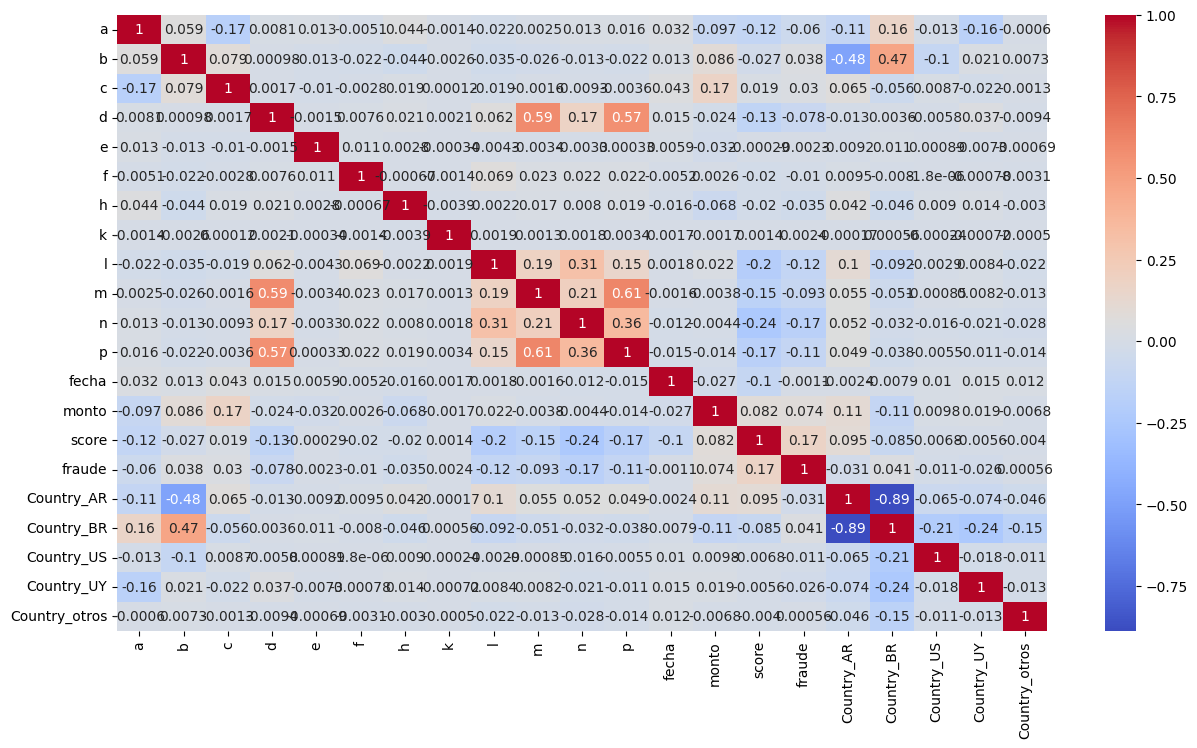

In [114]:
var_number=df.select_dtypes(exclude='object').columns
plt.figure(figsize=(15, 8))
sns.heatmap(df[var_number].corr(), annot=True, cmap="coolwarm")

In [115]:
#como se ve el fraude en razon del tiempo y la cantidad , hay una caida de evnetos de fraude el 15 abril de 2020
cantidad = df.set_index('fecha').resample('d').count()
fraude = df.set_index('fecha').resample('d').sum()
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=cantidad.index, y=cantidad['a'], mode='lines', name='eventos'), secondary_y=False)
fig.add_trace(go.Scatter(x=fraude.index, y=fraude['fraude'], mode='lines', name='fraude'), secondary_y=True)
fig.update_layout(title='Gráfico de Dos Series de Tiempo', xaxis_title='Fecha')
fig.update_yaxes(title_text="a", secondary_y=False)
fig.update_yaxes(title_text="fraude", secondary_y=True)
fig.show()


In [116]:
df[['j','fraude']].groupby('j').sum().sort_values('fraude',ascending=False)

,fraude
j,
cat_43b9c10,380
cat_d9753d4,115
cat_4249bd8,98
cat_8ef7164,81
cat_6c4cfdc,74
...,...
cat_60778f1,0
cat_605d60b,0
cat_604f01c,0


In [117]:
df.columns
df.head(2)

,a,b,c,d,e,f,g,h,j,k,l,m,n,p,fecha,monto,score,fraude,Country_AR,Country_BR,Country_US,Country_UY,Country_otros
0,4,0.6812,50084.12,50.0,0.0,20.0,AR,1,cat_d26ab52,0.365475,2479.0,952.0,1,1,2020-03-20 09:28:19,57.63,100,0,1,0,0,0,0
1,4,0.6694,66005.49,0.0,0.0,2.0,AR,1,cat_ea962fb,0.612728,2603.0,105.0,1,1,2020-03-09 13:58:28,40.19,25,0,1,0,0,0,0


#### correlaciones con el target

<Axes: xlabel='score'>

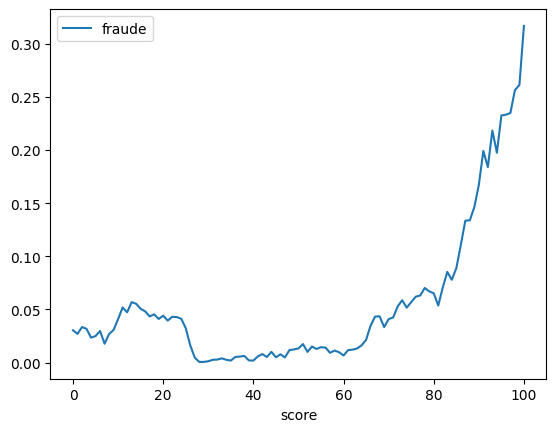

In [118]:
# la variable SCORE esta relacionada con el fraude, por lo que se podria tratar de un score crediticio o posible fraude.
df[['score','fraude']].groupby('score').mean().plot()

<Axes: xlabel='monto'>

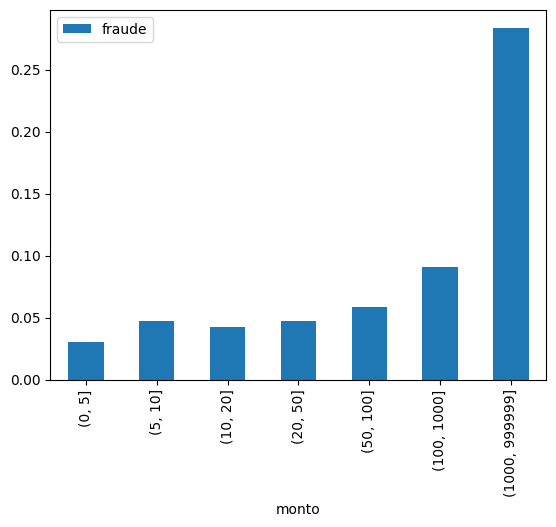

In [119]:
#la variable MONTO tambien esta relacionado con el fraude, a mayor monto mayor fraude
#df[['monto']].boxplot()
bins = [0, 5, 10, 20, 50, 100,1000,999999] 
pd.concat([pd.cut(df['monto'],bins=bins),df.fraude],axis=1).groupby('monto').mean().plot(kind='bar')

<Axes: xlabel='b'>

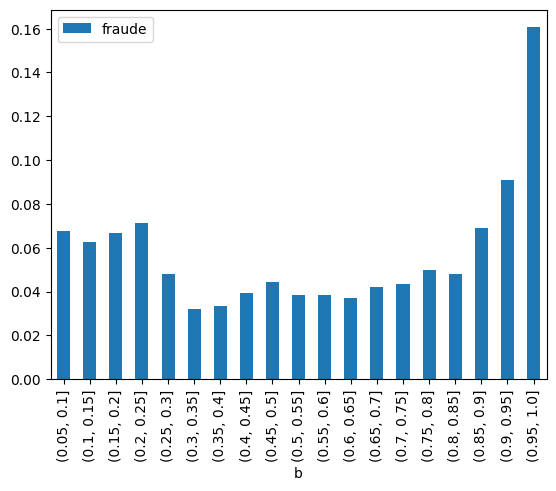

In [120]:
#la variable B aun que no da mucha evidencia es notable el mayor fraude en los ultimos rangos
pd.concat([pd.cut(df['b'],bins=np.arange(0.05, 1.05, 0.05)),df.fraude],axis=1).groupby('b').mean().plot(kind='bar')

<Axes: xlabel='c'>

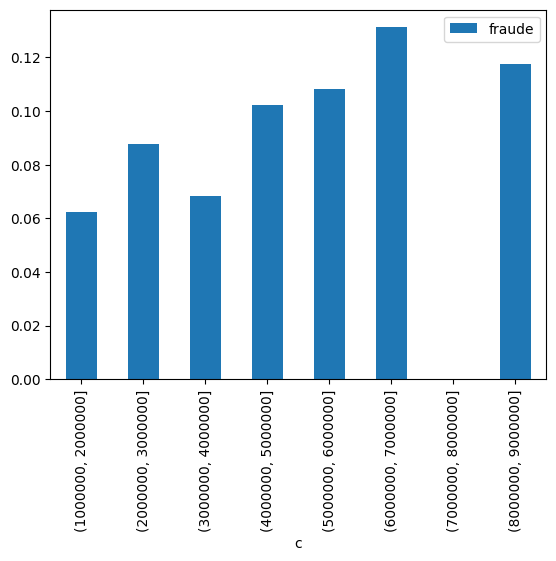

In [121]:
#la variable C otra variable con tendencia creciente, muy buen predictor sin estar relacionada
pd.concat([pd.cut(df['c'],bins=np.arange(1000000, 10000000, 1000000)),df.fraude],axis=1).groupby('c').mean().plot(kind='bar')

<Axes: xlabel='d'>

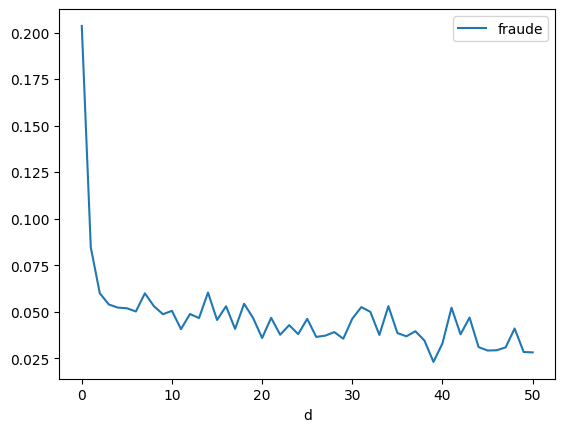

In [122]:
#la variable D una tendencia creciente,aunque los datos se concentran en los extremos
df[['d','fraude']].groupby('d').mean().plot()

<Axes: >

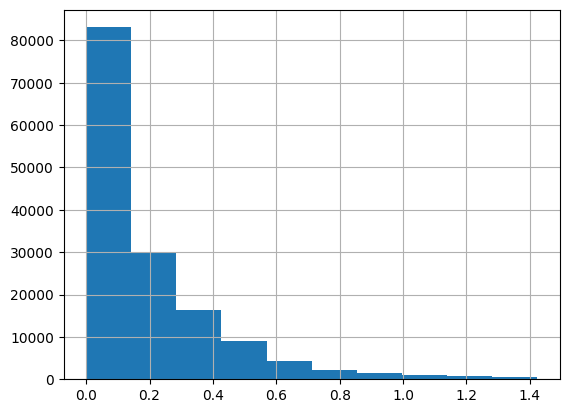

In [123]:
# la variable E con esta variable tengo mis reservas sera necesario quitar los outlier
df=df[df.e<df.e.quantile(0.99)]
df.e.hist()

<Axes: xlabel='e'>

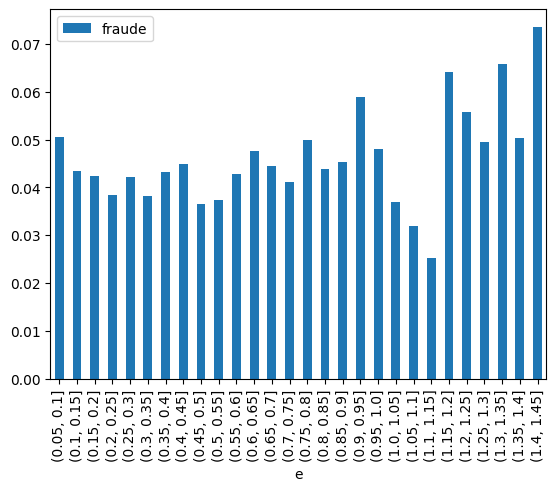

In [124]:
#al final resulta ser una variable un poco interesante vamos a dejarla para ver su comportamiento 
pd.concat([pd.cut(df['e'],bins=np.arange(0.05, 1.5, 0.05)),df.fraude],axis=1).groupby('e').mean().plot(kind='bar')

<Axes: xlabel='f'>

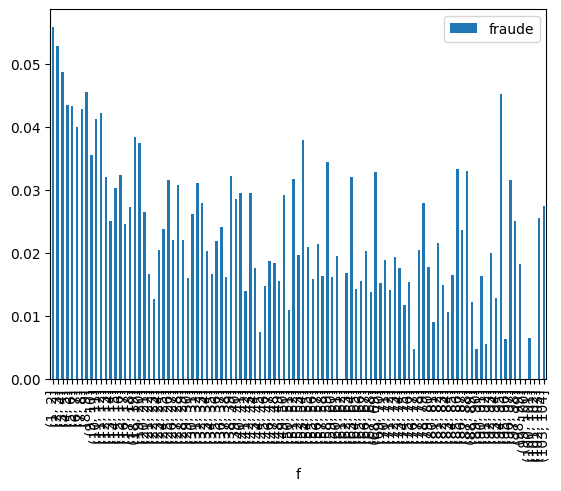

In [125]:
#la variable F la dejamos pendiente no esta claro si es necesario filtrar mas el df
tmp=df[df.f<df.f.quantile(0.99)]
pd.concat([pd.cut(tmp['f'],bins=np.arange(1, 105, 1)),df.fraude],axis=1).groupby('f').mean().plot(kind='bar')

<Axes: xlabel='h'>

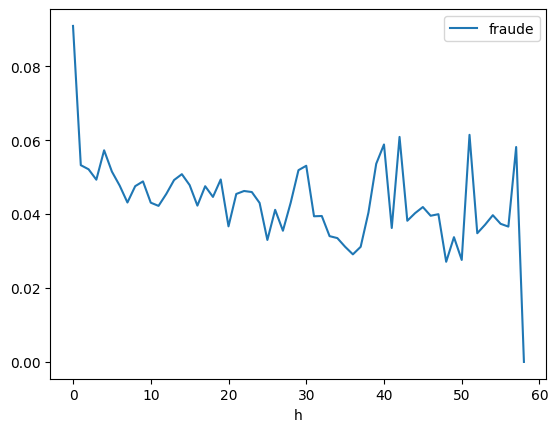

In [126]:
#la variable H, no hay un compotamiento claro,lo veremos mejor en el modelado
df=df[df.f<df.f.quantile(0.99)]
df[['h','fraude']].groupby('h').mean().plot()

<Axes: xlabel='k'>

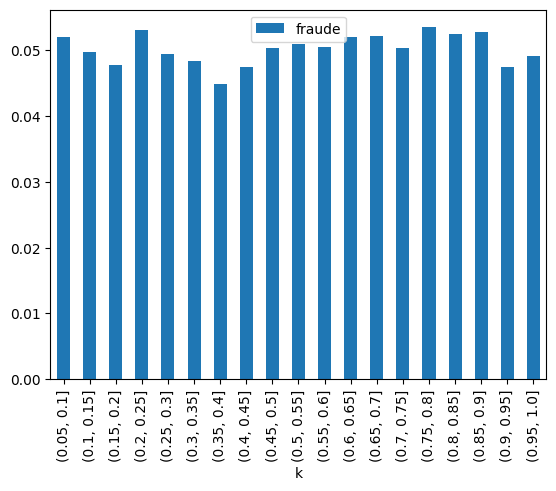

In [127]:
#la variable K tiene una distribución uniforme, en relación con el fraude al igual que H no parece que vaya aportar demaciado
pd.concat([pd.cut(df['k'],bins=np.arange(0.05, 1.05, 0.05)),df.fraude],axis=1).groupby('k').mean().plot(kind='bar')

<Axes: xlabel='l'>

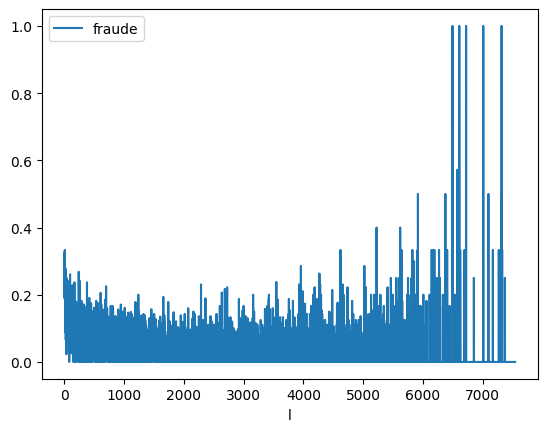

In [128]:
#la variable L, tiene un comportamiento intresante al final de sus valores
df[['l','fraude']].groupby('l').mean().plot()

<Axes: xlabel='m'>

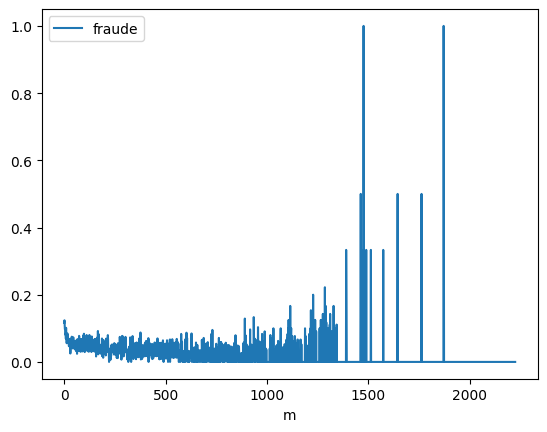

In [129]:
#la variable M, es muy interesante al revisar su comportamiento casi creciente en algunos puntos alejados 
df[['m','fraude']].groupby('m').mean().plot()

<Axes: xlabel='p'>

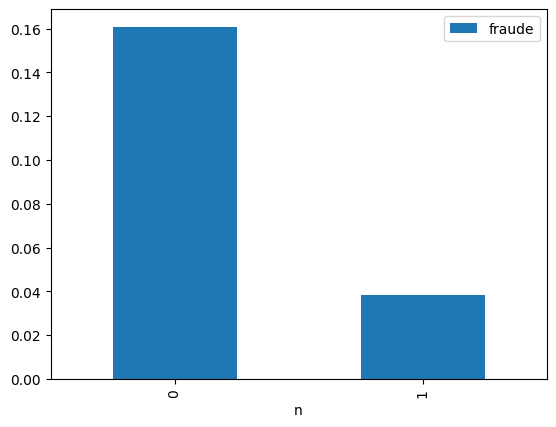

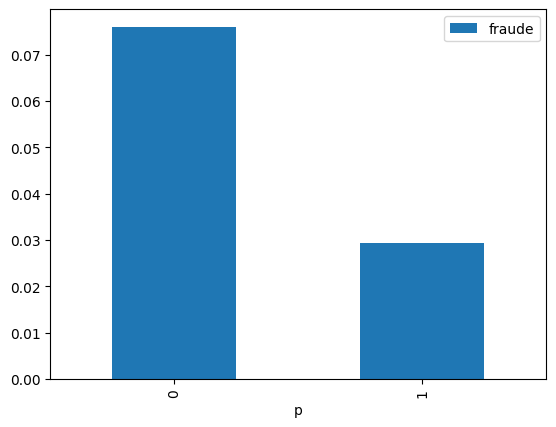

In [130]:
#n y p aunque muestran un comportamiento similar, no tieen fuerte correlación por lo que son intresantes para ver en el proceso de modelado
df[['n','fraude']].groupby('n').mean().plot(kind='bar')
df[['p','fraude']].groupby('p').mean().plot(kind='bar')

## resumen
### Después de realizar un análisis exhaustivo de las variables, hemos decidido tomar las siguientes acciones antes de avanzar hacia el modelado:

-Exclusión de la columna "o": Debido a la alta cantidad de valores nulos en la columna "o", se ha decidido eliminar esta columna, ya que su tratamiento resulta impracticable.

-Cambio de categoría de la columna "p" a valores numéricos 1 y 0: La columna "p" se ha transformado en una variable binaria, donde se asignan los valores 1 y 0, según corresponda.

-Imputación de variables numéricas: Para las variables numéricas "b," "c," "d," "f," "l," y "m," se ha optado por imputar los valores faltantes utilizando la mediana. Esto se debe a que estas variables no siguen claramente una distribución normal.

-Reducción de la dimensionalidad en la variable de ciudades "g": Se han seleccionado las cuatro ciudades mayoritarias o con mayor representación, mientras que las demás se han agrupado bajo la categoría "otros." Esto se ha realizado con el objetivo de reducir la dimensionalidad al convertir la variable "g" en variables dummy (country).

Tratamiento de outliers en las variables "e" y "f": Se han identificado y eliminado los outliers en las variables "e" y "f" utilizando el percentil .99 Esto ha permitido mejorar la representatividad de los datos.

Estas acciones han resultado en una reducción del tamaño del DataFrame final, pasando de 150,000 a 148,500 registros.

In [131]:
df

,a,b,c,d,e,f,g,h,j,k,l,m,n,p,fecha,monto,score,fraude,Country_AR,Country_BR,Country_US,Country_UY,Country_otros
0,4,0.6812,50084.12,50.0,0.000000,20.0,AR,1,cat_d26ab52,0.365475,2479.0,952.0,1,1,2020-03-20 09:28:19,57.63,100,0,1,0,0,0,0
1,4,0.6694,66005.49,0.0,0.000000,2.0,AR,1,cat_ea962fb,0.612728,2603.0,105.0,1,1,2020-03-09 13:58:28,40.19,25,0,1,0,0,0,0
2,4,0.4718,7059.05,4.0,0.463488,92.0,BR,25,cat_4c2544e,0.651835,2153.0,249.0,1,1,2020-04-08 12:25:55,5.77,23,0,0,1,0,0,0
3,4,0.7260,10043.10,24.0,0.046845,43.0,BR,43,cat_1b59ee3,0.692728,4845.0,141.0,1,1,2020-03-14 11:46:13,40.89,23,0,0,1,0,0,0
4,4,0.7758,16584.42,2.0,0.154616,54.0,BR,0,cat_9bacaa5,0.201354,2856.0,18.0,1,0,2020-03-23 14:17:13,18.98,71,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,4,0.2949,22356.33,6.0,0.000000,0.0,BR,3,cat_8f5bd9e,0.859495,3331.0,32.0,1,0,2020-04-09 10:39:50,26.71,62,0,0,1,0,0,0
149995,4,0.7728,34031.44,3.0,0.341379,18.0,BR,18,cat_039c51f,0.685681,2475.0,39.0,1,0,2020-04-11 17:25:30,5.47,37,0,0,1,0,0,0
149997,4,0.7012,77840.16,34.0,0.179331,3.0,BR,32,cat_ecc6934,0.315430,2497.0,219.0,1,1,2020-04-09 11:35:40,6.28,57,0,0,1,0,0,0
149998,2,0.7206,31001.65,50.0,0.000000,50.0,UY,31,cat_851cfbb,0.813346,3952.0,84.0,1,0,2020-04-19 17:48:17,40.52,0,0,0,0,0,1,0


In [ ]:
var=['a', 'b', 'c', 'd', 'e', 'f', 'h', 'k', 'l', 'm', 'n', 'p',
       'fecha', 'monto', 'score', 'fraude', 'Country_AR', 'Country_BR',
       'Country_US', 'Country_UY', 'Country_otros']
df=df[var]